In [1]:
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf

In [2]:
name = "TSLA"
tick = yf.Ticker(name)
df = tick.history(period="3y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-15 00:00:00-04:00,231.363327,237.726669,228.013336,235.979996,88006800,0.0,0.0
2021-03-16 00:00:00-04:00,234.449997,235.973328,223.666672,225.626663,96587100,0.0,0.0
2021-03-17 00:00:00-04:00,218.956665,234.576660,217.003326,233.936661,121117500,0.0,0.0
2021-03-18 00:00:00-04:00,228.096664,229.743332,217.333328,217.720001,99674400,0.0,0.0
2021-03-19 00:00:00-04:00,215.533340,219.076660,208.206665,218.289993,128682000,0.0,0.0


In [3]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.0,756.000000
mean,243.092236,248.366248,237.409206,242.906808,1.020053e+08,0.0,0.003968
std,56.613261,57.916399,54.964881,56.398278,4.034955e+07,0.0,0.109109
min,103.000000,111.750000,101.809998,108.099998,2.940180e+07,0.0,0.000000
25%,203.785004,207.764168,198.530006,203.354168,7.176938e+07,0.0,0.000000
50%,237.385002,241.483330,233.378334,237.450005,9.654750e+07,0.0,0.000000
75%,274.724998,280.144165,267.590012,273.979996,1.225149e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,3.065906e+08,0.0,3.000000


In [4]:
# Rename Date into DS and Close into Y
df = df.reset_index()
df = df[["Date", "Close"]]
df = df.rename(columns={"Date": "ds", "Close": "y"})
df["ds"] = df["ds"].dt.tz_localize(None)
df.head()

,ds,y
0,2021-03-15,235.979996
1,2021-03-16,225.626663
2,2021-03-17,233.936661
3,2021-03-18,217.720001
4,2021-03-19,218.289993


In [5]:
m = Prophet(daily_seasonality = True)
m.fit(df)

11:27:06 - cmdstanpy - INFO - Chain [1] start processing
11:27:07 - cmdstanpy - INFO - Chain [1] done processing


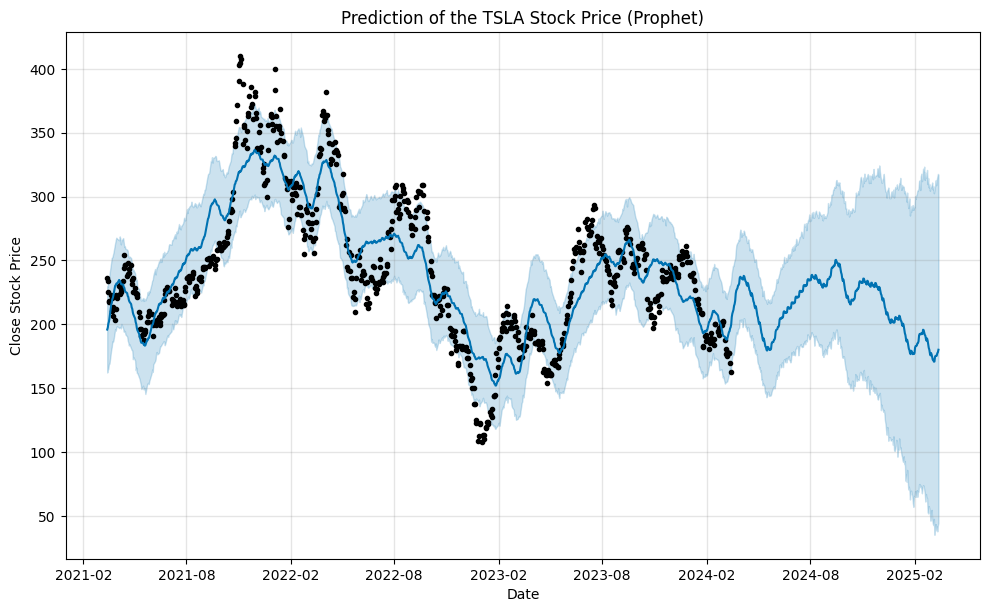

In [6]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the " + name + " Stock Price (Prophet)")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

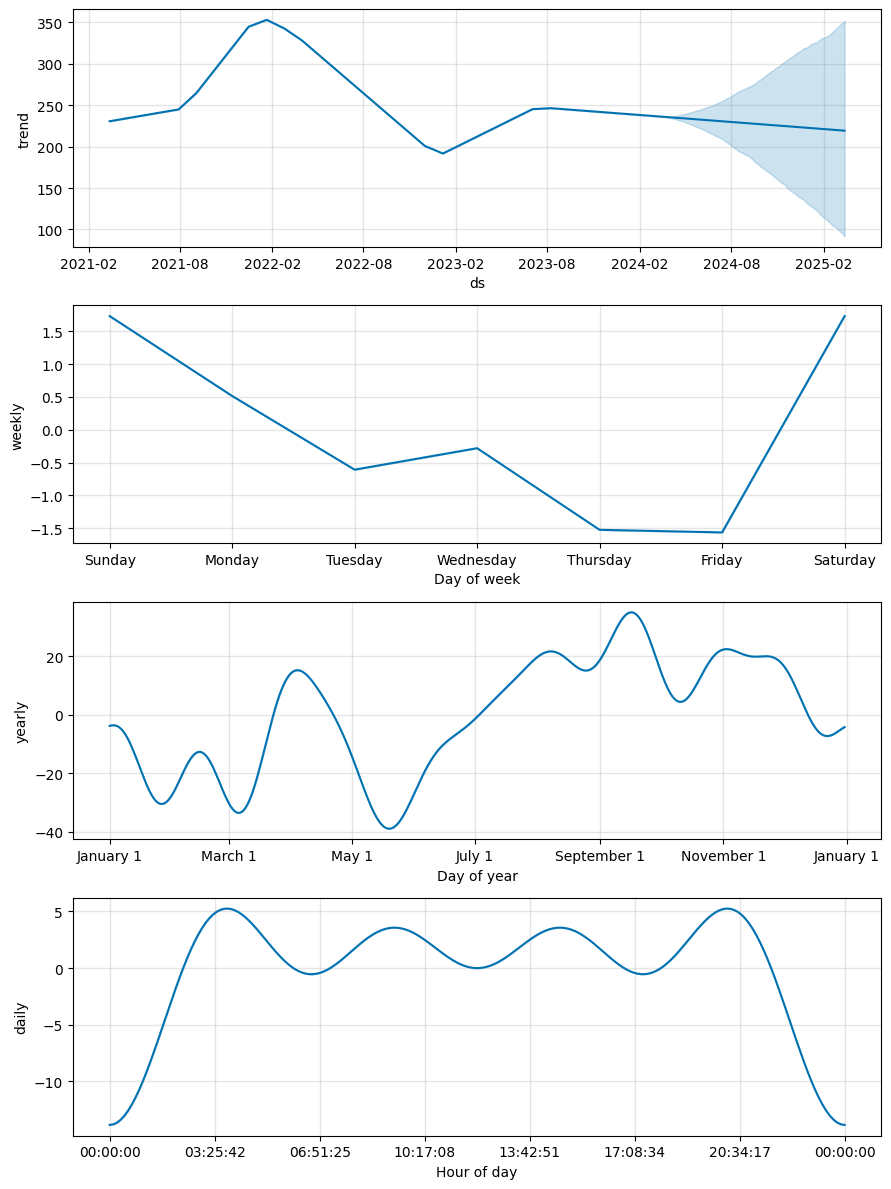

In [7]:
m.plot_components(prediction)
plt.show()